_Talia Thaib : Capstone Project IMDB Ratings_

# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

### Background

Webscraping is one of a process to collect informations through a web page specifically with the automated tools, and in this case with BeautifulSoup. BeautifulSoup is one if the Python Library we can use to help us pulling out data from the HTML files of a web page. Here some information about Beautiful Soup:

> [Beautiful Soup 4 Documentation ](https://beautiful-soup-4.readthedocs.io/en/latest/)


In this section, as an example, I'm going to gather information based on IMDB web page. I will explain more detail about the workflow and step by step of webscrapping using BeautifulSoup. Without further ado, let's begin.



---


## 1. Web Page Inspections


Before anything else, the impotant thing we must do is to analyze the web page. We must at least know how the web page look like, so that we can conclude **what kind of information** we want to gather from a certain web page and **where** exactly the data placed in the page.

In this case, I'm going to use this specific page to do get the sample:

> [IMDB: Released beetween 01/01/2012 - 31/01/2021 ](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31)



As you have noticed from the link above, the sample I'm going to use is focus on the Movie List specifically **which are released in the periode range between 1 January to 31 December 2021**. 

Now let's take a look how the web page displayed.

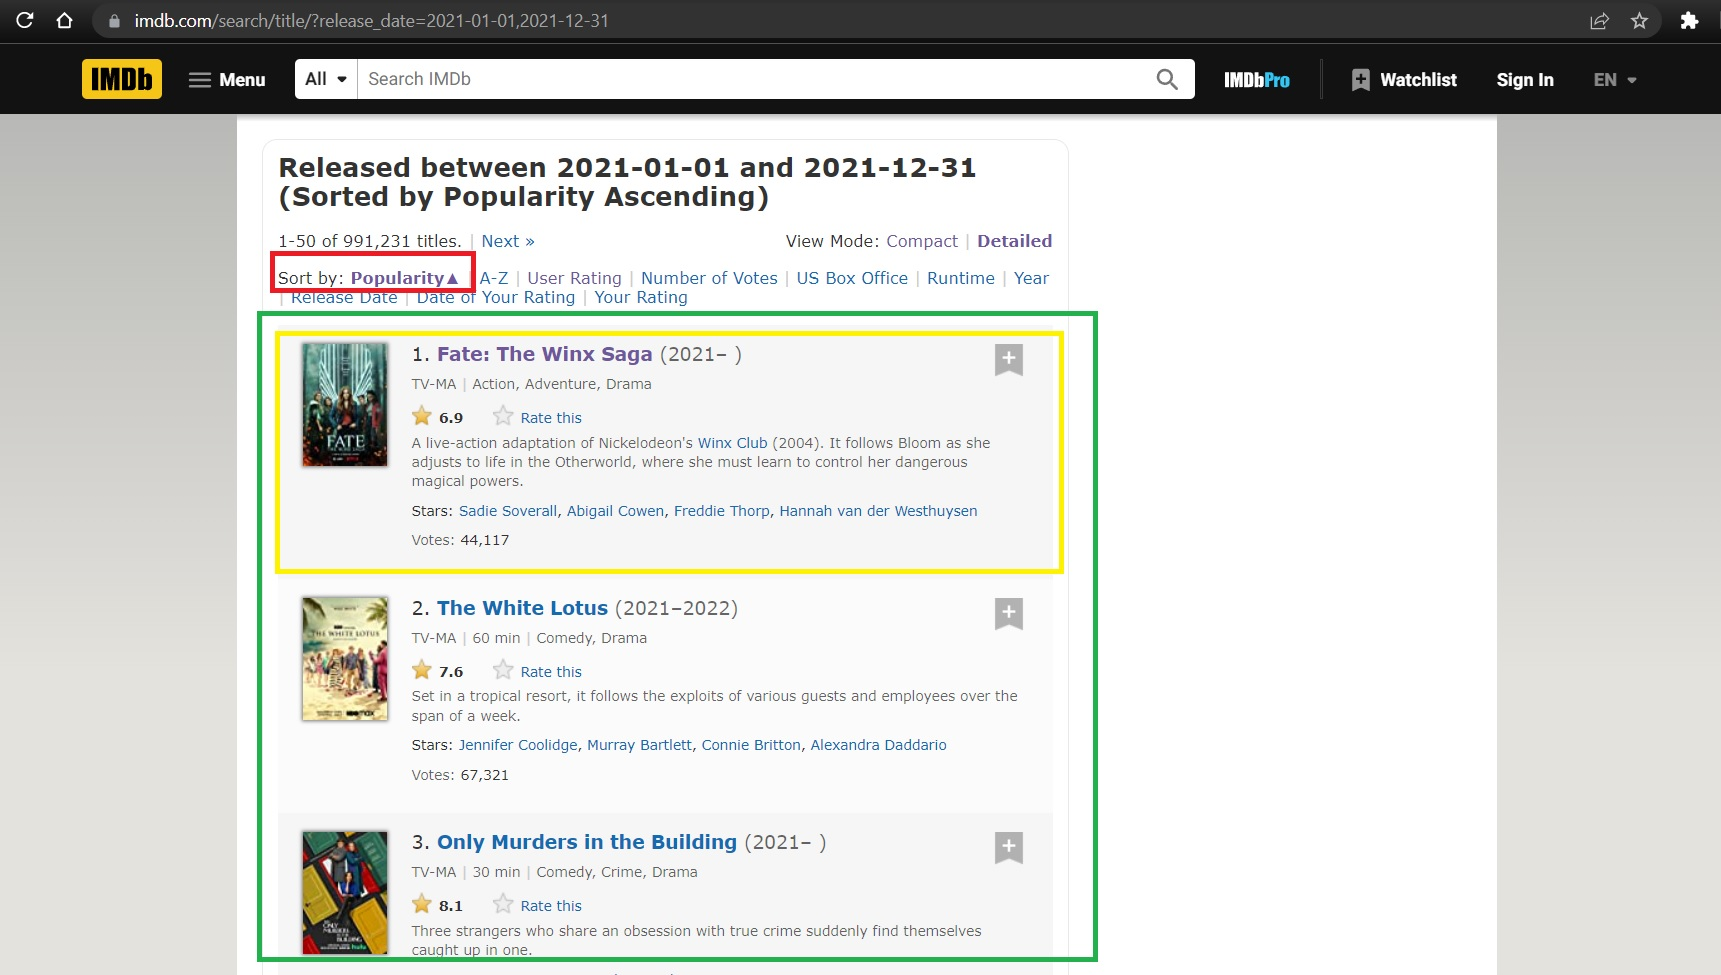

from the image above, these are some few informations we may have:
- **Red Box** : The Movie/TV-MA list is sorted by popularity (in this case in ascending order)
- **Green Box** : The Movies are stored in a table with a single column and rows
- **Yellow Box** : each row contains the detail informations from one movie (such as image cover, rank, title, genre, rate, cast, movie descriptions, and votes)

Now to set our framework, from this point on our focus is **to gather the informations from top 7 most popular movies**. Le's jump right in!

---

## 2. Preparation 

### Requesting the Data

In [1]:
import pandas as pd

# Import requests to get response (HTML) to the server of the assign URL
import requests

# Import BeautifulSoup to create BeautifulSoup object
from bs4 import BeautifulSoup 

Let's begin with requesting the web from the site with `get` method.

In [2]:
url_get = requests.get("https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31")

To visualize what exactly we get from the `request.get()`, we can use `.content()` to see the result.


To simplified the display, let's do the slicing method. We can set the number as needed to see ho many characters to be dipayed.

In [3]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

### Creating a BeautifulSoup Object

As we can see from the result, we get unstructured and complex character.

To convert what is written in the HTML to look as what we've seen in the actual web page, we need codes to process it. We might see patterns and understand about the HTML tags and elements, but still, we need a long time to read them all.


BeautifulSoup is the answer, it will help us to make read HTML. BeautifulSoup can help us navigate, searching or define classes or find attributes of a tag element has and convert it into beautifulsoup object. In another words, help us to save more time and works!

Let's make Beautiful soup object and feel free to explore the object, with **Python Parser : _html.parser_**

In [4]:
# convert the HTML into a BeautifulSoup Object and put into a new variable for manipulation processing

soup = BeautifulSoup(url_get.content,"html.parser")

## 3. Finding the right key to scrap the data and extract expected informations

As I've mentioned the focus of this section is to gather the informations from top 7 most popular movies, we have to find the precise ***KEY*** to define which section of the HTML that contain the desired data. Let's get back to the web page.

If you are a Microsoft and Chrome user, to see the web page HTML we click:
- CTRL + SHIFT I  (to display the HTML in the same page)
- Fn + F12        (to display the HTML in the same page)
- CTRL + U        (to open in a new tab)

**To make our work easier and efficient, we can also point our cursor into the desired section of the web page, RIGHT CLICK and SELECT inspect, the HTML bar will be opened starting form the page section we choose**

#### Finding the Right Key

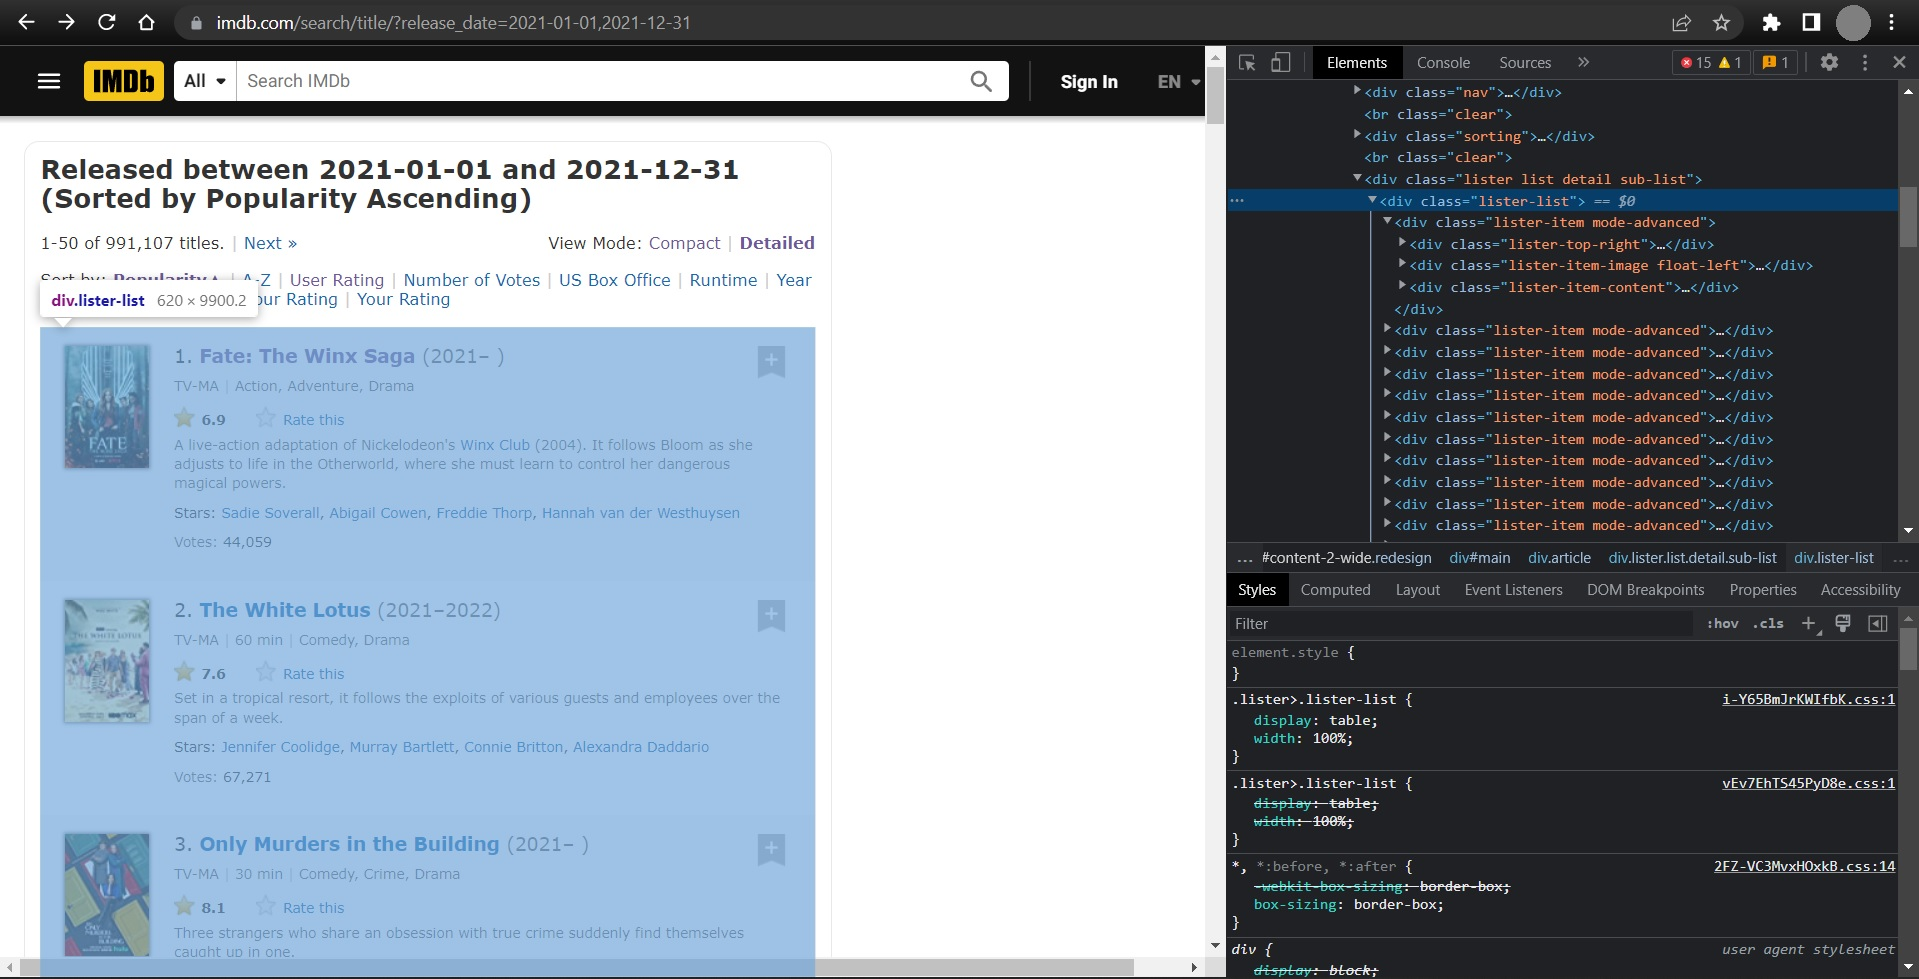

From the image above it explains :
1. When we click a certain row in the HTML bar, it gives us hints of a certain section of the web page with the colored block
2. Our data is in the table, or to be precised in the div.class = "lister-list"

As you may have notice that **div.class = "lister-list"** is nesting in the **div.class="lister list detail sub-list"**, but we want to narrow our search so that we take only the relevan contents and as unique key as possible, therefore we can choose the **div.class = "lister-list"** instead.

In [5]:
# Set the HTML Movie List into a new variable (I'm using table)

table = soup.find('div', class_ = "lister-list")

# [NO PRINT IN VS]  Recheck again how it looks like
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


> as expected, now the **table** variable contains only the HTML line starting from from **div.class = "lister-list"** until only to the bottom of the movie list table.

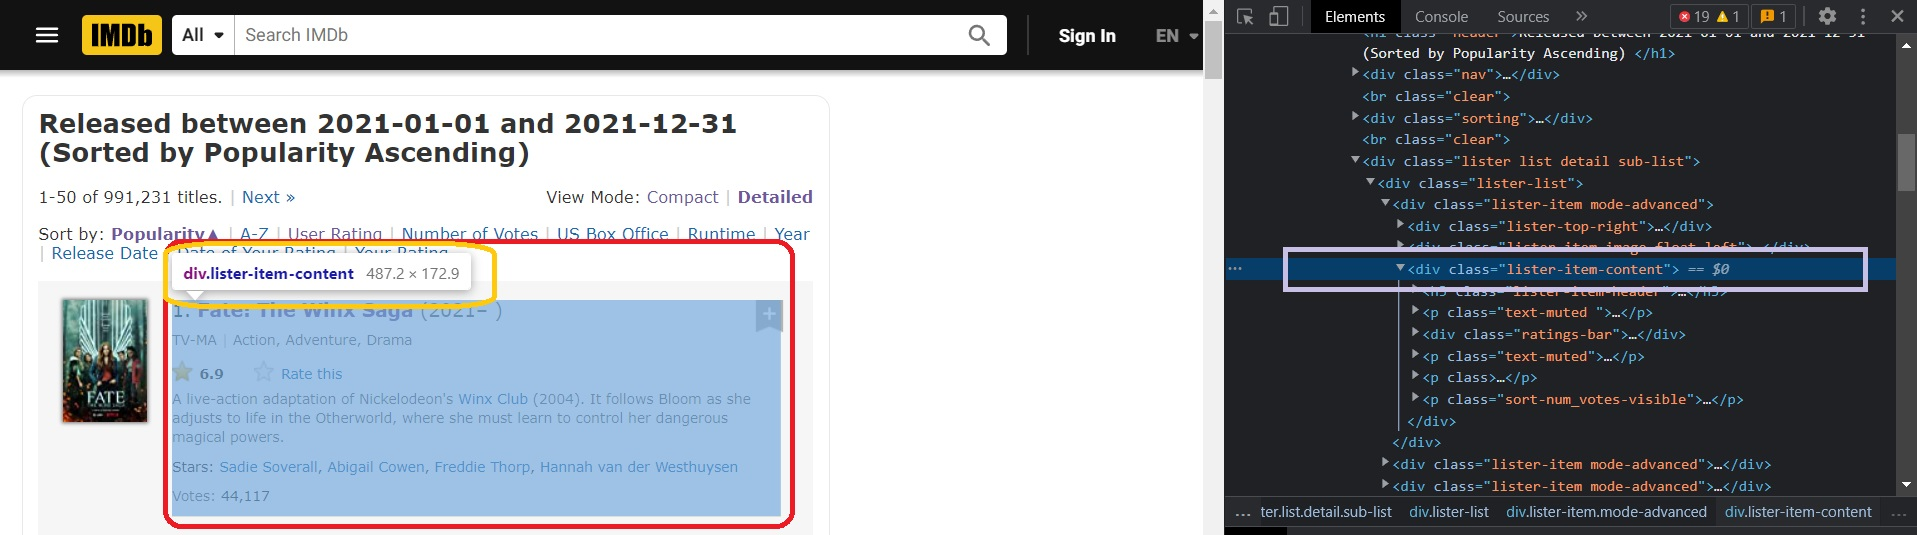

To define the key to access the informations of Movie's Title, Movie's Imdb Rating, Metascore and the Votes, we can inspect the nesting element inside the of a class.

Now we know where is the desired informations is located in the HTML, we can use Python and BeautifulSoup to navigate and search to the table variable

In [6]:
'''
Because all the information from each movie stored in the class = 'lister-item-content', 
I make a new variable to further Loop Process
'''

movie_table = table.find_all('div', class_ = "lister-item-content")

## 4. Collecting the Desired Data

I'm using looping method and `.find()` to let Python and BeautifulSoup search any match in every row in the **top7_movies** variable

In [8]:
temp = [] #initiating a list


# Extracting Movie's Title
for i in movie_table:
    titles = i.find('a').string #to convert result into string object
    
# Extract Genre
    x = (i.find('span', {'class' : "genre"}).string).split(',') #split string into list
    General_genres = x[-1].strip()  #slice genre last list to describe the movie in general genre
    Specific_genres = x[0].strip()  #slice genre first list to describe the movie in specific genre
    
# Extracting Movie's PG Rating
    pg_rate = i.find('span',  class_ = "certificate")
    if pg_rate != None:
        pg_rate = pg_rate.string
    
    
# Extracting Movie's Rating
    ratings = float(i.find('strong').string) #to convert from string into float
    
    
# Extracting Movie's Votes
    votes = i.find('span', {'name':'nv'}).string.replace(',', '') #to remove (,) in the number of votes
    
# Extracting Movie's Metascore
    metascore = i.find('span', {'class':'metascore favorable'})
    if metascore != None:                           #To return each output with conditional statemenent with desired format
        metascore = metascore.string.strip() 
        
    temp.append((titles, General_genres, Specific_genres, pg_rate, ratings, votes, metascore))

In [9]:
#recheck the temp

temp[:10]

[('Fate: The Winx Saga', 'Drama', 'Action', '16+', 6.9, '44549', None),
 ('The White Lotus', 'Drama', 'Comedy', None, 7.6, '67758', None),
 ('Only Murders in the Building',
  'Drama',
  'Comedy',
  '17+',
  8.1,
  '96388',
  None),
 ('Abbott Elementary', 'Comedy', 'Comedy', None, 8.2, '13760', None),
 ('The Black Phone', 'Thriller', 'Horror', '17+', 7.0, '113257', '65'),
 ('Resident Alien', 'Mystery', 'Comedy', None, 8.1, '39243', None),
 ('American Horror Stories', 'Mystery', 'Drama', '21+', 6.2, '20787', None),
 ('1883', 'Western', 'Drama', None, 8.8, '63217', None),
 ('Reservation Dogs', 'Crime', 'Comedy', '17+', 8.1, '14640', None),
 ('Spider-Man: No Way Home', 'Fantasy', 'Action', 'SU', 8.3, '730503', '71')]

## 5. Creating data frame & Data wrangling

In [10]:
# Set the index number based on the rank in the web page, so we don't get a misleading information

movie_df = pd.DataFrame(temp, columns = ['Title', 'General_genres', 'Specific_genres', 'pg_rate', 'Imdb_Ratings',
                        'Votes', 'Metascore'], index = range(1,51))

In [11]:
movie_df.head()

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore
1,Fate: The Winx Saga,Drama,Action,16+,6.9,44549,None
2,The White Lotus,Drama,Comedy,None,7.6,67758,None
3,Only Murders in the Building,Drama,Comedy,17+,8.1,96388,None
4,Abbott Elementary,Comedy,Comedy,None,8.2,13760,None
5,The Black Phone,Thriller,Horror,17+,7.0,113257,65


From the DataFrame above, we can see that there some columns that has Null values. On the other hand we can also get the information that in the Metascore column based on the actual web site that all None values are either TV-Show or a TV Series because Metascore only given to a Movie, therefore we can create new column to give us more information to our DataFrame the Category of Movie and TV-Show/Series.

In [12]:
#Create Category column to define a Series or a Movie

category = []
for i in movie_df['Metascore']:
    if i == None:
        category.append('TV-Show/Series')
    else:
        category.append('Movie')

# Create Category Column
movie_df['Category'] = category

In [13]:
#Recheck the Df
movie_df.head()

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore,Category
1,Fate: The Winx Saga,Drama,Action,16+,6.9,44549,None,TV-Show/Series
2,The White Lotus,Drama,Comedy,None,7.6,67758,None,TV-Show/Series
3,Only Murders in the Building,Drama,Comedy,17+,8.1,96388,None,TV-Show/Series
4,Abbott Elementary,Comedy,Comedy,None,8.2,13760,None,TV-Show/Series
5,The Black Phone,Thriller,Horror,17+,7.0,113257,65,Movie


### Preprocessing the Data

In [14]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            50 non-null     object 
 1   General_genres   50 non-null     object 
 2   Specific_genres  50 non-null     object 
 3   pg_rate          36 non-null     object 
 4   Imdb_Ratings     50 non-null     float64
 5   Votes            50 non-null     object 
 6   Metascore        13 non-null     object 
 7   Category         50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


Now this is the list of columns i'd like to adjust into more suitable datatypes:
- General_genres, Specific_genres, Category => into category
- Metascore, votes => into integer

Filling NULL values:
- Fill metascore Tv Show with 0
- Fill Null values in pg_rate with ffill method


_Note : Filling the NULL values in pg_rate is based on the conclusion how the HTML script and the display in the actual website, the Null values are actually equal (has the same pg_rate) as the above rows_

In [15]:
# Fill missing values and change the data type

movie_df[['Metascore']] = movie_df[['Metascore']].fillna(0)
movie_df[['Votes', 'Metascore']] = movie_df[['Votes', 'Metascore']].astype('int')
movie_df[['General_genres', 'Specific_genres', 'Category']] = movie_df[['General_genres', 'Specific_genres', 'Category']]. astype('category')
movie_df['pg_rate'] = movie_df['pg_rate'].fillna(method = 'ffill')

In [16]:
movie_df.head()

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore,Category
1,Fate: The Winx Saga,Drama,Action,16+,6.9,44549,0,TV-Show/Series
2,The White Lotus,Drama,Comedy,16+,7.6,67758,0,TV-Show/Series
3,Only Murders in the Building,Drama,Comedy,17+,8.1,96388,0,TV-Show/Series
4,Abbott Elementary,Comedy,Comedy,17+,8.2,13760,0,TV-Show/Series
5,The Black Phone,Thriller,Horror,17+,7.0,113257,65,Movie


In [282]:
movieMetascore = movie[['Title', 'General_genres', 'Specific_genres', 'Metascore']]

In [280]:
movie_df[['Imdb_Ratings','pg_rate', 'Votes']]

,Imdb_Ratings,pg_rate,Votes
1,6.9,16+,44549
2,7.6,16+,67758
3,8.1,17+,96388
4,8.2,17+,13760
5,7.0,17+,113257
6,8.1,17+,39243
7,6.2,21+,20787
8,8.8,21+,63217
9,8.1,17+,14640
10,8.3,SU,730503


In [279]:
movie_df['Imdb_Ratings']

1     6.9
2     7.6
3     8.1
4     8.2
5     7.0
6     8.1
7     6.2
8     8.8
9     8.1
10    8.3
11    5.7
12    8.0
13    7.2
14    6.1
15    8.6
16    6.3
17    6.2
18    6.3
19    6.6
20    9.0
21    7.9
22    7.1
23    7.4
24    7.3
25    5.7
26    8.0
27    7.6
28    6.6
29    7.1
30    8.2
31    7.8
32    7.7
33    7.1
34    5.6
35    6.3
36    7.9
37    6.3
38    8.4
39    7.7
40    7.3
41    6.7
42    7.6
43    7.2
44    8.2
45    6.3
46    6.6
47    5.4
48    7.4
49    7.1
50    5.8
Name: Imdb_Ratings, dtype: float64

### Subsetting the Data Based On Category

In [17]:
# Subset into only Movie list
movie = movie_df[movie_df['Category'] == 'Movie']
movie.head()

In [19]:
# Subset into only NON -  Movie list
tv_series = movie_df[movie_df['Category'] != 'Movie']
tv_series.head()

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore,Category
1,Fate: The Winx Saga,Drama,Action,16+,6.9,44549,0,TV-Show/Series
2,The White Lotus,Drama,Comedy,16+,7.6,67758,0,TV-Show/Series
3,Only Murders in the Building,Drama,Comedy,17+,8.1,96388,0,TV-Show/Series
4,Abbott Elementary,Comedy,Comedy,17+,8.2,13760,0,TV-Show/Series
6,Resident Alien,Mystery,Comedy,17+,8.1,39243,0,TV-Show/Series
7,American Horror Stories,Mystery,Drama,21+,6.2,20787,0,TV-Show/Series
8,1883,Western,Drama,21+,8.8,63217,0,TV-Show/Series
9,Reservation Dogs,Crime,Comedy,17+,8.1,14640,0,TV-Show/Series
11,La scuola cattolica,Drama,Drama,18+,5.7,1803,0,TV-Show/Series
14,Forsvinningen på Lørenskog,Drama,Documentary,18+,6.1,1073,0,TV-Show/Series


### FEW INSIGHTS

In [20]:
#Movie and TV Series Popularity Comparison

mov_rate = (movie.shape[0]/movie_df.shape[0])*100
tv_rate = (tv_series.shape[0]/movie_df.shape[0])*100

print(mov_rate, tv_rate)

26.0 74.0


In [21]:
# Most Popular Genres

gen_genr = movie_df['General_genres'].value_counts().idxmax()
spe_genr = movie_df['Specific_genres'].value_counts().idxmax()

print(gen_genr, spe_genr)

Drama Action


From 50 entries, (Movie and TV Series) that released in the year of 2021:
1. TV show/Series are more popular than movies based on the imdb web page
2. It's also shown as well in 1-4 rank most popular movies are from TV-show/Series in the DataFrame
3. and from a simple operation above, it seems that most popular genre in 2021 is drama and action 


In [23]:
# 5 Most Popular in 2021
movie_df.head()

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore,Category
1,Fate: The Winx Saga,Drama,Action,16+,6.9,44549,0,TV-Show/Series
2,The White Lotus,Drama,Comedy,16+,7.6,67758,0,TV-Show/Series
3,Only Murders in the Building,Drama,Comedy,17+,8.1,96388,0,TV-Show/Series
4,Abbott Elementary,Comedy,Comedy,17+,8.2,13760,0,TV-Show/Series
5,The Black Phone,Thriller,Horror,17+,7.0,113257,65,Movie


## Aggregating  & Visualizations the Data

In [242]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Now I'm going to make a new dataframe for further analysis focusing in the top 7 most popular movies

In [194]:
top7_movies = movie.head(7)
top7_movies

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore,Category
5,The Black Phone,Thriller,Horror,17+,7.0,113257,65,Movie
10,Spider-Man: No Way Home,Fantasy,Action,SU,8.3,730503,71,Movie
12,Dune: Part One,Drama,Action,SU,8.0,614482,74,Movie
13,Licorice Pizza,Romance,Comedy,17+,7.2,105611,90,Movie
17,Mona Lisa and the Blood Moon,Thriller,Fantasy,R,6.2,1031,69,Movie
24,No Time to Die,Thriller,Action,R13+,7.3,390311,68,Movie
25,The Matrix Resurrections,Sci-Fi,Action,D17+,5.7,243272,63,Movie


## Genre and Votes

#### 7 Most Popular Movies and Vote Counts from IMDB

Text(0.5, 1.0, '7 Most Voted from TOP Popular Movies')

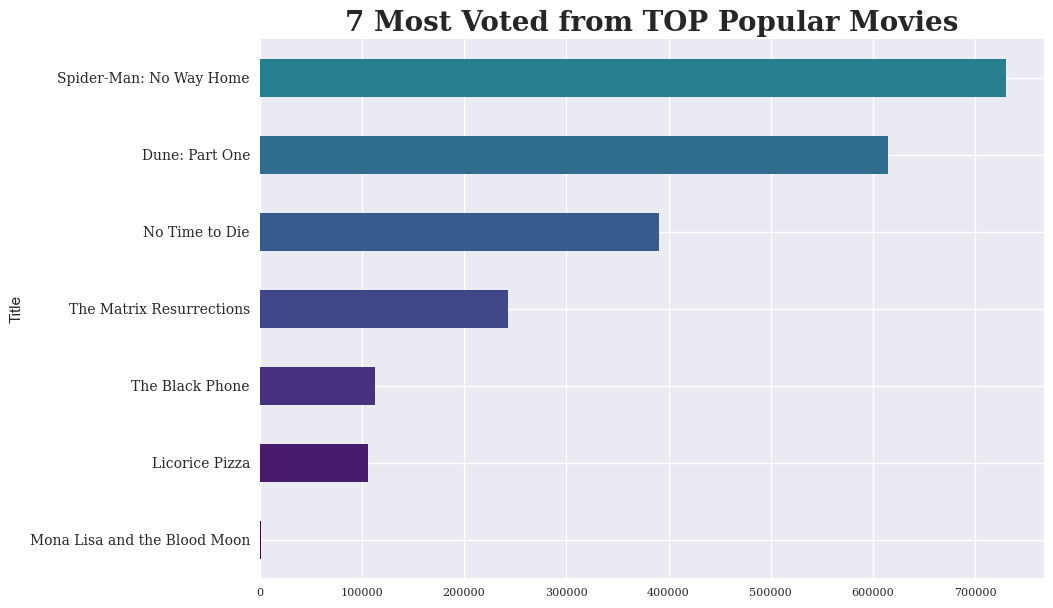

In [267]:
top7_votes = top7_movies.sort_values('Votes')

cmap = plt.get_cmap('viridis')
colors = cmap(range(0, 200, 18))


top7_votes.plot.barh(x = 'Title', y = 'Votes', 
                     color = colors,
                     legend = None)

plt.xticks(fontsize = 8, fontname = 'serif')
plt.yticks(fontsize = 10, fontname = 'serif')
plt.title("7 Most Voted from TOP Popular Movies", fontsize = 20, fontweight = "bold", fontname = 'serif')


<AxesSubplot:>

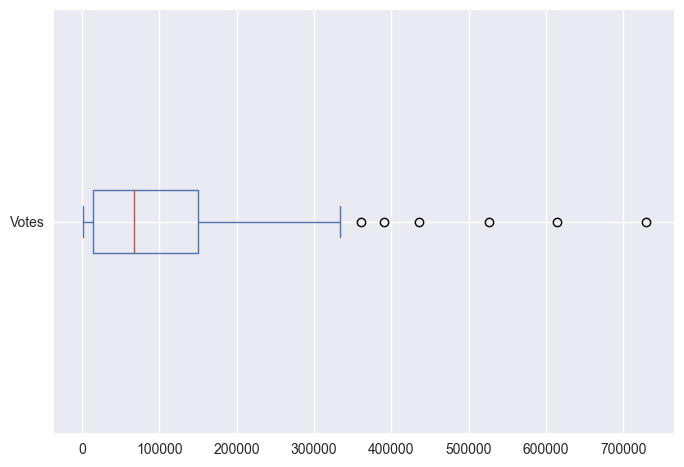

In [348]:
# Votes from 13 entries Movie from the first page in Popular Movies 
movie_df['Votes'].plot.box(vert = False)


# INSIGHTS:

1. Spider-Man: No Way Home is at the 2nd place by Movie's Popularity
2. Spider-Man: No Way Home has the highest votes among other movies

**Compared to the avarage votes of all Movies entries from IMDB (around under 100.000 votes), surely that Spider-Man: No Way Home and Dune: Part One has an extreme number of votes, and both movies are from the Action genres**


#### 7 Most Popular Movies and Genre

<AxesSubplot:ylabel='Genre'>

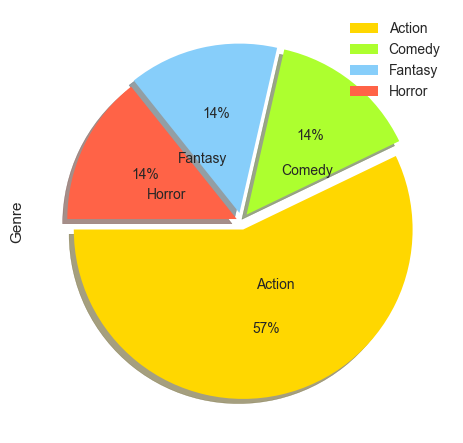

In [322]:
top7_genres = pd.crosstab(index = top7_movies['Specific_genres'],
                          columns = 'count',
                          values = top7_movies['Specific_genres'],
                          aggfunc = 'count').sort_values('count', ascending = False).head(4)
top7_genres.plot.pie(y = 'count', ylabel = 'Genre',
                     colors = ('gold', 'greenyellow', 'lightskyblue', 'tomato'), 
                     explode = (0.05, 0.05, 0.05, 0.03),
                     shadow = True, startangle = 180.0, labeldistance = 0.33,
                     autopct='%1.0f%%')

#### Popular Movies and Genre in general

<AxesSubplot:ylabel='Genre'>

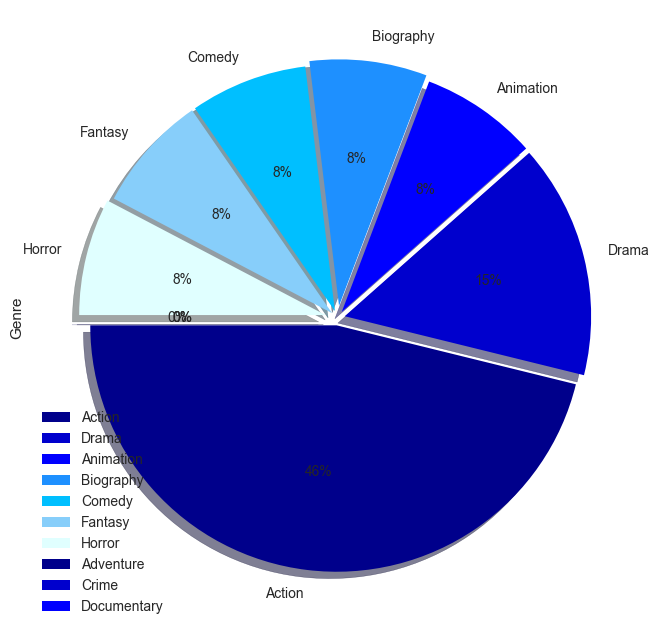

In [162]:
Movie_genres = pd.crosstab(index = movie['Specific_genres'],
                          columns = 'count',
                          values = movie['Specific_genres'],
                          aggfunc = 'count').sort_values('count', ascending = False)
Movie_genres.plot.pie(y = 'count', ylabel = 'Genre',
                     explode = (0.03, 0.03, 0.03, 0.05, 0.03, 0.03, 0.05, 0.03, 0.03, 0.05),
                     colors = ('darkblue', 'mediumblue', 'blue', 'dodgerblue', 'deepskyblue', 'lightskyblue','lightcyan'),
                     shadow = True, startangle = 180.0, labeldistance = 1.1,
                     autopct='%1.0f%%', figsize = (8,8))

# INSIGHTS:

57% from the 7 most popular movie is Action Movie 46% from most popular movie (all entries in the first page) is action Movie. It seems that Action movie is quite popular generally speaking

# Metascore and IMDB Ratings

<AxesSubplot:>

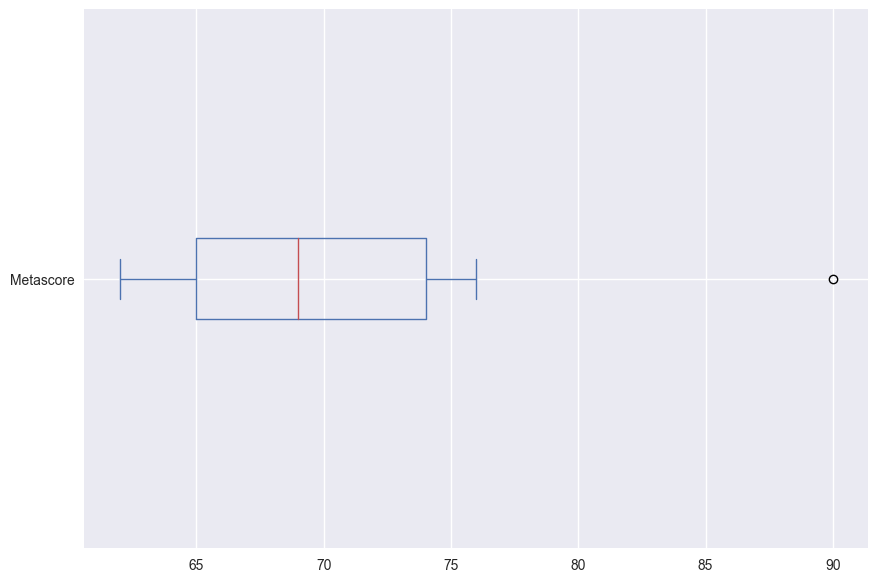

In [265]:
#Average Metascore from 13 Most Popular Movies

movie[['Metascore']].plot.box(vert= False)

In [271]:
#Most Popular Movie which has Metascore above average

top7_movies[top7_movies['Metascore'] >= (movie['Metascore'].quantile(.5))]

,Title,General_genres,Specific_genres,pg_rate,Imdb_Ratings,Votes,Metascore,Category
10,Spider-Man: No Way Home,Fantasy,Action,SU,8.3,730503,71,Movie
12,Dune: Part One,Drama,Action,SU,8.0,614482,74,Movie
13,Licorice Pizza,Romance,Comedy,17+,7.2,105611,90,Movie
17,Mona Lisa and the Blood Moon,Thriller,Fantasy,R,6.2,1031,69,Movie


# Final Insights

Based on the IMDB page, **Spider-Man: No Way Home** has the best of overall score (highest votes, Metascore above average, and highest IMDB Ratings) among other entries. Based on the data we got, because of the majority of top popular movies are from Action genre (in 2021), there's a possibilty that people interested in action movies.